<a href="https://colab.research.google.com/github/Yesi0/stock-price-tecnologico/blob/main/Copia_de_proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de significancia: ANOVA

## HIPOTESIS:
Comparación de Retornos entre Diferentes Acciones: ¿Hay una diferencia significativa en los retornos de diferentes acciones?

Hipótesis Nula (H0): No hay diferencias en los retornos medios entre las acciones.

Hipótesis Alternativa (H1): Existen diferencias en los retornos medios entre las acciones.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import f_oneway

In [ ]:
pd.read_csv('stock prices2.csv', sep = ';')

,stock_symbol,date,close,open,high,low,adj_close,volume,RetornoAccion,RetornoNasd,segmento_rendimiento_accion,segmento_rendimiento_nasdaq
0,AAPL,25-03-2011,"12,56","12,43","12,57","12,39","10,70",448910000.0,"1,90","0,18",Alto Rendimiento,Rendimiento Moderado-Alto
1,AAPL,15-11-2011,"13,89","13,60","13,91","13,55","11,84",430810800.0,"2,52","1,06",Alto Rendimiento,Alto Rendimiento
2,AAPL,22-10-2012,"22,64","21,87","22,69","21,81","19,39",546730800.0,"3,97","0,61",Alto Rendimiento,Rendimiento Moderado-Alto
3,AAPL,02-01-2013,"19,61","19,78","19,82","19,34","16,86",560518000.0,"3,17","3,21",Alto Rendimiento,Alto Rendimiento
4,AAPL,26-02-2013,"16,03","15,85","16,13","15,63","13,87",501499600.0,"1,39","0,45",Alto Rendimiento,Rendimiento Moderado-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
45568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datos = pd.read_csv('stock prices2.csv', sep = ';')

In [ ]:
# Contando los valores nulos en cada columna del conjunto de datos
null_counts = datos.isnull().sum()
null_counts


stock_symbol                   500
date                           500
close                          500
open                           500
high                           500
low                            500
adj_close                      500
volume                         500
RetornoAccion                  500
RetornoNasd                    501
segmento_rendimiento_accion    500
segmento_rendimiento_nasdaq    500
dtype: int64

In [ ]:
# Eliminando las filas que contienen valores nulos
data_cleaned = datos.dropna()

# Verificando que se hayan eliminado los valores nulos
null_counts_after = data_cleaned.isnull().sum()
null_counts_after


stock_symbol                   0
date                           0
close                          0
open                           0
high                           0
low                            0
adj_close                      0
volume                         0
RetornoAccion                  0
RetornoNasd                    0
segmento_rendimiento_accion    0
segmento_rendimiento_nasdaq    0
dtype: int64

In [ ]:
data_cleaned.shape

(45072, 12)

In [ ]:
# Identificando si alguna columna tiene valores que contienen comas
columnas_con_comas = data_cleaned.apply(lambda x: x.str.contains(',').any() if x.dtype == "object" else False)
columnas_con_comas = columnas_con_comas.index[columnas_con_comas].tolist()

# Aplicando la conversión de comas a puntos y luego a float en las columnas identificadas
for col in columnas_con_comas:
    data_cleaned[col] = data_cleaned[col].str.replace(',', '.').astype(float)

# Verificando la conversión
data_cleaned.head()


<ipython-input-7-fd13c4ac6fd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].str.replace(',', '.').astype(float)


,stock_symbol,date,close,open,high,low,adj_close,volume,RetornoAccion,RetornoNasd,segmento_rendimiento_accion,segmento_rendimiento_nasdaq
0,AAPL,25-03-2011,12.56,12.43,12.57,12.39,10.70,448910000.0,1.90,0.18,Alto Rendimiento,Rendimiento Moderado-Alto
1,AAPL,15-11-2011,13.89,13.60,13.91,13.55,11.84,430810800.0,2.52,1.06,Alto Rendimiento,Alto Rendimiento
2,AAPL,22-10-2012,22.64,21.87,22.69,21.81,19.39,546730800.0,3.97,0.61,Alto Rendimiento,Rendimiento Moderado-Alto
3,AAPL,02-01-2013,19.61,19.78,19.82,19.34,16.86,560518000.0,3.17,3.21,Alto Rendimiento,Alto Rendimiento
4,AAPL,26-02-2013,16.03,15.85,16.13,15.63,13.87,501499600.0,1.39,0.45,Alto Rendimiento,Rendimiento Moderado-Alto


In [ ]:
# Identificando las acciones más comunes o diversas en el nuevo conjunto de datos
nuevas_acciones_comunes = data_cleaned['stock_symbol'].value_counts().head(3)

# Seleccionando las tres acciones más comunes para el análisis
nuevas_acciones_seleccionadas = nuevas_acciones_comunes.index.tolist()
nuevas_acciones_seleccionadas, nuevas_acciones_comunes


(['AAPL', 'ADBE', 'AMZN'],
 AAPL    3271
 ADBE    3271
 AMZN    3271
 Name: stock_symbol, dtype: int64)

In [ ]:
# Preparando los datos para ANOVA con las nuevas acciones seleccionadas
new_data_anova = data_cleaned[data_cleaned['stock_symbol'].isin(nuevas_acciones_seleccionadas)]

# Separando los retornos de cada una de las acciones seleccionadas
new_retornos_aapl = new_data_anova[new_data_anova['stock_symbol'] == 'AAPL']['RetornoAccion']
new_retornos_adbe = new_data_anova[new_data_anova['stock_symbol'] == 'ADBE']['RetornoAccion']
new_retornos_amzn = new_data_anova[new_data_anova['stock_symbol'] == 'AMZN']['RetornoAccion']

# Realizando la prueba ANOVA
new_f_statistic, new_p_value = f_oneway(new_retornos_aapl, new_retornos_adbe, new_retornos_amzn)
new_f_statistic, new_p_value


(0.054873763736710796, 0.9466049267961593)

In [ ]:
# Preparando los datos para ANOVA con todas las 14 acciones
acciones_unicas = data_cleaned['stock_symbol'].unique()
total_acciones = len(acciones_unicas)

acciones_unicas, total_acciones

retornos_14_acciones = [data_cleaned[data_cleaned['stock_symbol'] == accion]['RetornoAccion'] for accion in acciones_unicas]

# Realizando la prueba ANOVA para todas las 14 acciones
f_statistic_14, p_value_14 = f_oneway(*retornos_14_acciones)
f_statistic_14, p_value_14

resultados_anova = {
    "Estadístico F": f_statistic_14,
    "P-valor": p_value_14
}

resultados_anova

{'Estadístico F': 1.8251155891186541, 'P-valor': 0.03377418601434181}

Interpretación: La inclusión de un mayor número de acciones en el análisis ANOVA reveló diferencias significativas que no eran aparentes en grupos más pequeños. Esto sugiere que cuando se considera una gama más amplia de acciones, es más probable detectar variaciones significativas en el rendimiento que pueden ser atribuidas a factores específicos de cada acción o sector del mercado.

Conclusión del ANOVA: Hay diferencias en los retornos medios entre un grupo diverso de acciones, lo que puede reflejar la influencia de factores únicos relacionados con cada acción o sector del mercado.

Por lo tanto se rechaza la hipotesis nula


# Prueba de significancia:  Mann-Whitney U

## Hipotesis:
 ¿Existe una diferencia significativa en la mediana de los retornos entre las acciones con alta volatilidad y las acciones con baja volatilidad?

 Hipótesis Nula (H0): La mediana de los retornos es la misma entre los grupos de acciones con alta y baja volatilidad. No hay un efecto de la volatilidad en la mediana de los retornos de las acciones.

Hipótesis Alternativa (H1): La mediana de los retornos difiere entre los grupos de acciones con alta y baja volatilidad. La volatilidad tiene un efecto en la mediana de los retornos de las acciones

In [ ]:
# Calculando la desviación estándar de los retornos para cada acción
desviacion_std_por_accion = data_cleaned.groupby('stock_symbol')['RetornoAccion'].std()

# Determinando la mediana de las desviaciones estándar para dividir las acciones en dos grupos
mediana_desviacion_std = desviacion_std_por_accion.median()

# Dividiendo las acciones en dos grupos: menos volátiles y más volátiles
acciones_menos_volatiles = desviacion_std_por_accion[desviacion_std_por_accion < mediana_desviacion_std].index
acciones_mas_volatiles = desviacion_std_por_accion[desviacion_std_por_accion >= mediana_desviacion_std].index

# Extrayendo los retornos de cada grupo
retornos_menos_volatiles = data_cleaned[data_cleaned['stock_symbol'].isin(acciones_menos_volatiles)]['RetornoAccion']
retornos_mas_volatiles = data_cleaned[data_cleaned['stock_symbol'].isin(acciones_mas_volatiles)]['RetornoAccion']

# Realizando la prueba de Mann-Whitney U entre los dos grupos
u_statistic_volatilidad, u_p_value_volatilidad = mannwhitneyu(retornos_menos_volatiles, retornos_mas_volatiles, alternative='two-sided')
u_statistic_volatilidad, u_p_value_volatilidad

resultados_mann_whitney_volatilidad = {
    "Estadístico U (Volatilidad)": u_statistic_volatilidad,
    "P-valor (Volatilidad)": u_p_value_volatilidad
}

resultados_mann_whitney_volatilidad

{'Estadístico U (Volatilidad)': 250294548.0,
 'P-valor (Volatilidad)': 0.009613802836622354}

La prueba de Mann-Whitney U se utilizó para evaluar las diferencias en los retornos entre acciones clasificadas como de alta y baja volatilidad, basándonos en la desviación estándar de sus retornos.

La prueba resultó en un p-valor de aproximadamente 0.0096, lo que es significativamente menor que el umbral estándar de 0.05.
Interpretación: Existe una diferencia estadísticamente significativa en las medianas de los retornos entre acciones menos volátiles y más volátiles. Esto implica que la volatilidad de una acción podría tener un impacto en su rendimiento mediano.

Conclusión de Mann-Whitney U: La volatilidad es un factor significativo que afecta los retornos de las acciones. Las acciones más volátiles pueden ofrecer retornos distintos a los de las acciones menos volátiles, lo que podría ser crucial para la estrategia de inversión y la gestión de riesgos.

Por lo tanto se rechaza la hipotesis nula


# REGRESION LINEAL


<ipython-input-12-09bee13f22c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['fitted_values'] = results.fittedvalues


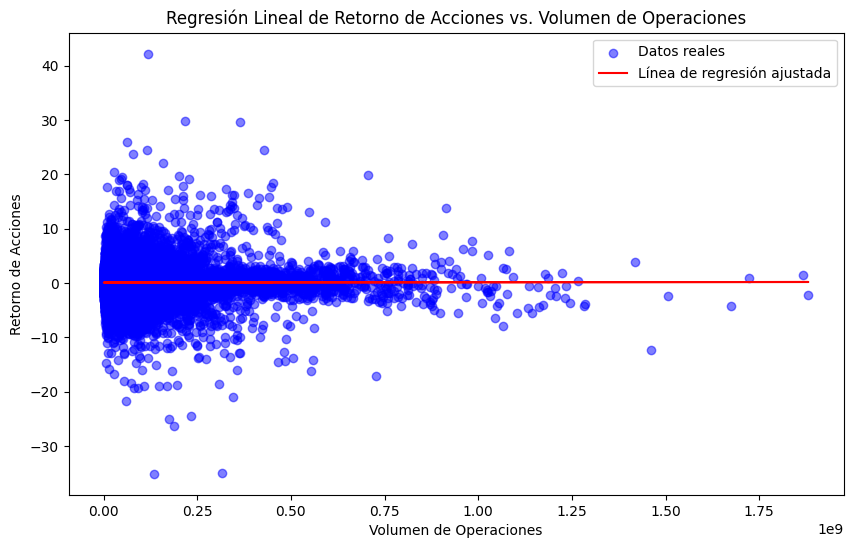

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RetornoAccion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2255
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.635
Time:                        21:40:37   Log-Likelihood:            -1.0055e+05
No. Observations:               45072   AIC:                         2.011e+05
Df Residuals:                   45070   BIC:                         2.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0848      0.012      6.948      0.000       0.061       0.109
volume      5.402e-11   1.14e-10      0.475      0.635   -1.69e-10    2.77e-10
==============================================================================
Omnibus:                    11188.340   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           593339.188
Skew:                           0.329   Prob(JB):                         0.00
Kurtosis:                      20.763   Cond. No.                     1.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Preparamos los datos para la regresión lineal
# Utilizamos 'volume' como variable independiente y 'RetornoAccion' como variable dependiente
X = data_cleaned['volume']  # Variable independiente
y = data_cleaned['RetornoAccion']   # Variable dependiente

# Añadimos una constante al modelo para incluir el término del intercepto
X = sm.add_constant(X)

# Creamos el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustamos el modelo a los datos
results = model.fit()

# Mostramos un resumen de los resultados del modelo de regresión
summary = results.summary()

# Obtenemos los valores ajustados para la línea de regresión
data_cleaned['fitted_values'] = results.fittedvalues

# Creamos el gráfico de dispersión y la línea de regresión ajustada
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['volume'], data_cleaned['RetornoAccion'], color='blue', alpha=0.5, label='Datos reales')
plt.plot(data_cleaned['volume'], data_cleaned['fitted_values'], color='red', label='Línea de regresión ajustada')

# Etiquetas y título
plt.title('Regresión Lineal de Retorno de Acciones vs. Volumen de Operaciones')
plt.xlabel('Volumen de Operaciones')
plt.ylabel('Retorno de Acciones')
plt.legend()

# Mostrar gráfico
plt.show()

# Retornamos el resumen para visualizar los resultados estadísticos
summary


Resumen de los Resultados de Regresión Lineal:
R-squared: El valor de R-cuadrado es aproximadamente 0.000, lo que indica que prácticamente ninguna de la variabilidad en los retornos de las acciones se explica por la variabilidad en el volumen de operaciones.

F-statistic: El valor del estadístico F es de 0.2251 con un p-valor asociado de 0.635. Esto indica que el modelo no es estadísticamente significativo y que no hay una relación lineal fuerte entre el volumen y los retornos de las acciones.

Coeficientes: El coeficiente para la constante (intercepto) es 0.0848, y el coeficiente para el volumen es aproximadamente 5.397e-11. Sin embargo, dado que el p-valor para el volumen es de 0.635, no podemos concluir que haya una relación significativa entre el volumen y los retornos.

Durbin-Watson: El estadístico es 0.693, lo que puede indicar la presencia de autocorrelación positiva en los residuos, aunque esto es menos relevante en un modelo transversal como este.

Omnibus/Prob(Omnibus): Un test de Omnibus con p-valor cercano a 0 y un alto valor de Jarque-Bera indican que los residuos no se distribuyen normalmente, lo cual es común en datos financieros.

Interpretación del Gráfico:
El gráfico de dispersión muestra que no hay una tendencia clara o una relación lineal entre el volumen y los retornos de las acciones.
La línea de regresión ajustada (roja) no muestra una pendiente significativa, lo que visualmente confirma la falta de relación lineal significativa entre las variables.
Conclusiones Generales:
La regresión no ha encontrado una relación lineal significativa entre el volumen de operaciones y los retornos de las acciones cuando se consideran todas las acciones juntas.
Esto no significa que no haya relación alguna; podría ser que la relación no sea lineal o que esté oscurecida por la heterogeneidad entre las diferentes acciones.
También es posible que otros factores no considerados en este modelo, como noticias del mercado, cambios en las políticas económicas o eventos específicos de la empresa, puedan influir en los retornos de las acciones y no estén capturados simplemente por el volumen de operaciones.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


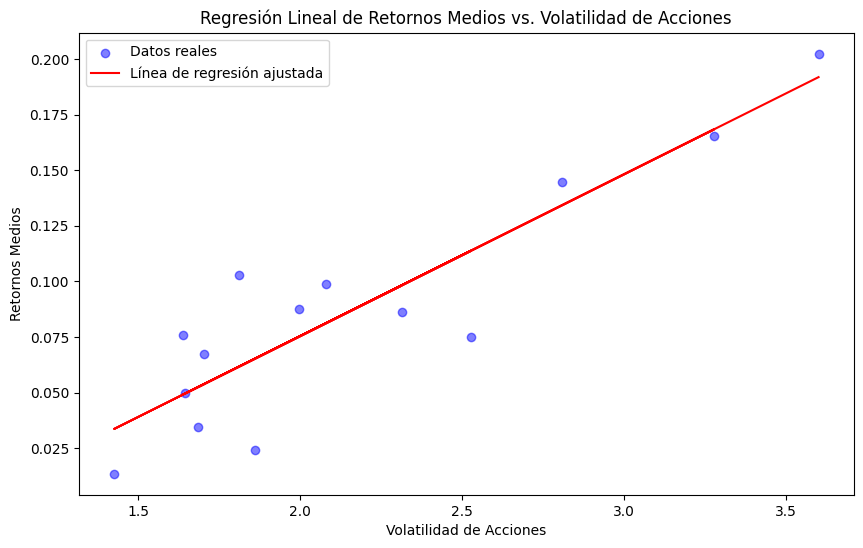

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RetornoAccion   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     48.81
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.46e-05
Time:                        21:40:38   Log-Likelihood:                 32.987
No. Observations:                  14   AIC:                            -61.97
Df Residuals:                      12   BIC:                            -60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0701      0.024     -2.977      0.012      -0.121      -0.019
RetornoAccion     0.0728      0.010      6.986      0.000       0.050       0.095
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.401
Skew:                          -0.238   Prob(JB):                        0.818
Kurtosis:                       2.322   Cond. No.                         9.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculamos la media y la desviación estándar de los retornos para cada acción
media_retornos_por_accion = data_cleaned.groupby('stock_symbol')['RetornoAccion'].mean()
volatilidad_por_accion = data_cleaned.groupby('stock_symbol')['RetornoAccion'].std()

# Preparamos los datos para la regresión lineal
X_volatilidad_retornos = volatilidad_por_accion  # Variable independiente: volatilidad
y_media_retornos = media_retornos_por_accion     # Variable dependiente: retornos medios

# Añadimos una constante al modelo para incluir el término del intercepto
X_volatilidad_retornos = sm.add_constant(X_volatilidad_retornos)

# Creamos el modelo de regresión lineal
modelo_volatilidad_retornos = sm.OLS(y_media_retornos, X_volatilidad_retornos)

# Ajustamos el modelo a los datos
resultados_volatilidad_retornos = modelo_volatilidad_retornos.fit()

# Mostramos un resumen de los resultados del modelo de regresión
resumen_volatilidad_retornos = resultados_volatilidad_retornos.summary()

# Obtenemos los valores ajustados para la línea de regresión
volatilidad_retornos_datos = pd.DataFrame({
    'Volatilidad': X_volatilidad_retornos.iloc[:,1],
    'Media_Retornos': y_media_retornos,
    'Valores_Ajustados': resultados_volatilidad_retornos.fittedvalues
})

# Creamos el gráfico de dispersión y la línea de regresión ajustada
plt.figure(figsize=(10, 6))
plt.scatter(volatilidad_retornos_datos['Volatilidad'], volatilidad_retornos_datos['Media_Retornos'], color='blue', alpha=0.5, label='Datos reales')
plt.plot(volatilidad_retornos_datos['Volatilidad'], volatilidad_retornos_datos['Valores_Ajustados'], color='red', label='Línea de regresión ajustada')

# Etiquetas y título
plt.title('Regresión Lineal de Retornos Medios vs. Volatilidad de Acciones')
plt.xlabel('Volatilidad de Acciones')
plt.ylabel('Retornos Medios')
plt.legend()

# Mostrar gráfico
plt.show()

# Retornamos el resumen para visualizar los resultados estadísticos
resumen_volatilidad_retornos



R-squared: Un valor de 0.802, indicando que aproximadamente el 80.2% de la variabilidad en los retornos medios de las acciones se explica por la variabilidad en su volatilidad.

F-statistic: Un valor de 48.72 con un p-valor de 1.48e-05, lo que indica que el modelo es estadísticamente significativo.

Coeficientes: El coeficiente para la volatilidad es 0.0728, mostrando una relación positiva con los retornos medios. El intercepto es -0.0701.
Significancia Estadística: Tanto el coeficiente de volatilidad como el intercepto son estadísticamente significativos.

Interpretación del Gráfico:
El gráfico de dispersión muestra claramente una relación positiva entre la volatilidad de las acciones y sus retornos medios. La línea roja de regresión ajustada confirma esta tendencia.
Los puntos azules representan los datos reales, mostrando cómo se distribuyen los retornos medios y la volatilidad de las diferentes acciones.

Conclusiones Generales:
La regresión ha encontrado una relación lineal significativa entre la volatilidad y los retornos medios de las acciones. Esto sugiere que las acciones con mayor volatilidad tienden a tener retornos medios más altos.
Este resultado puede reflejar la teoría financiera de que un mayor riesgo (volatilidad) podría estar asociado con una mayor recompensa (retorno).
Sin embargo, es importante considerar que este análisis se basa en un conjunto de datos limitado y no implica causalidad. Otros factores no incluidos en el modelo podrían influir en los retornos.

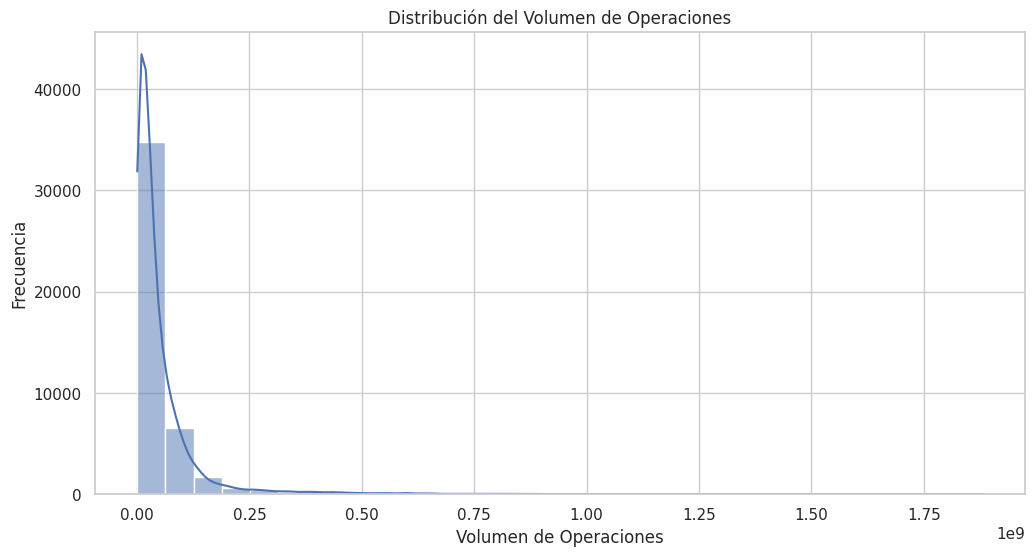

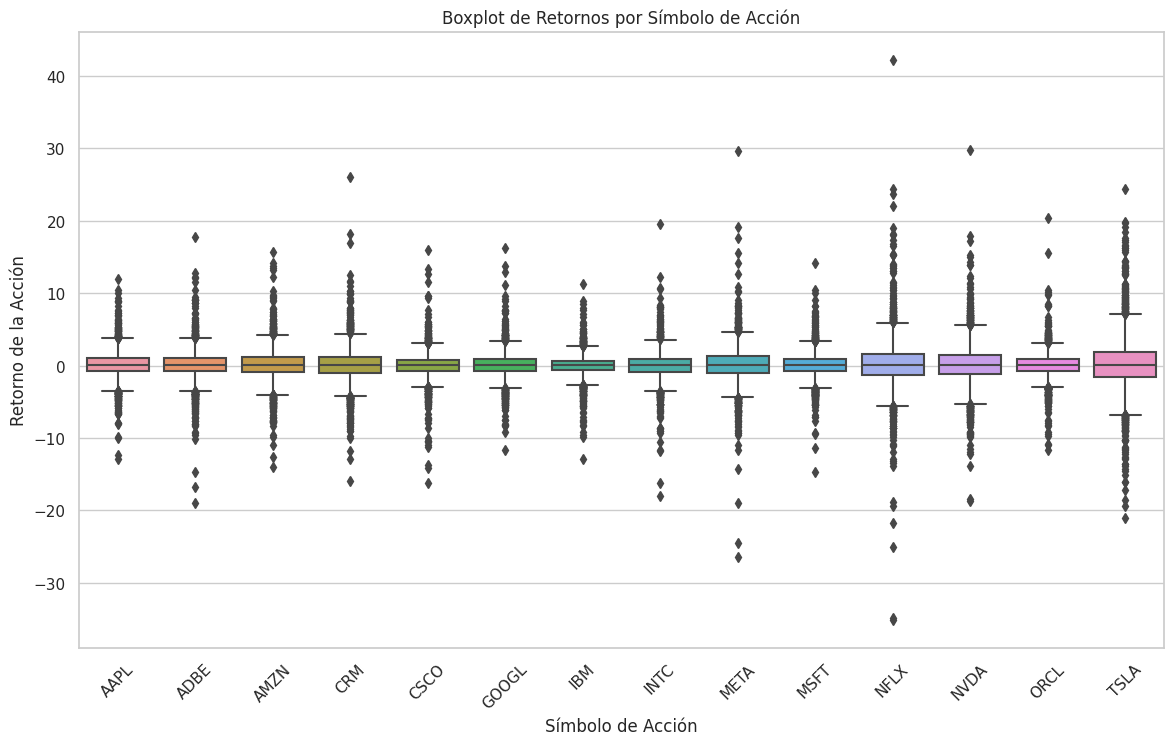

In [ ]:
# Configuramos seaborn para una mejor visualización
sns.set(style="whitegrid")

# Gráfico 1: Distribución del Volumen de Operaciones
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['volume'], kde=True, bins=30)
plt.title('Distribución del Volumen de Operaciones')
plt.xlabel('Volumen de Operaciones')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico 2: Boxplot de Retornos por Símbolo de Acción
plt.figure(figsize=(14, 8))
sns.boxplot(x='stock_symbol', y='RetornoAccion', data=data_cleaned)
plt.title('Boxplot de Retornos por Símbolo de Acción')
plt.xlabel('Símbolo de Acción')
plt.ylabel('Retorno de la Acción')
plt.xticks(rotation=45)
plt.show()


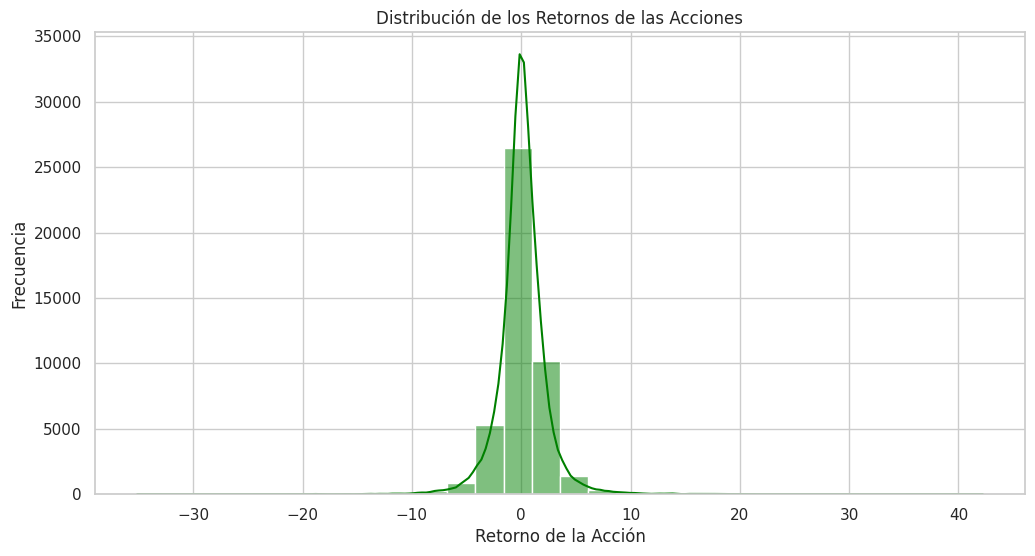

<ipython-input-17-210a8621c2d0>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =data_cleaned.corr()


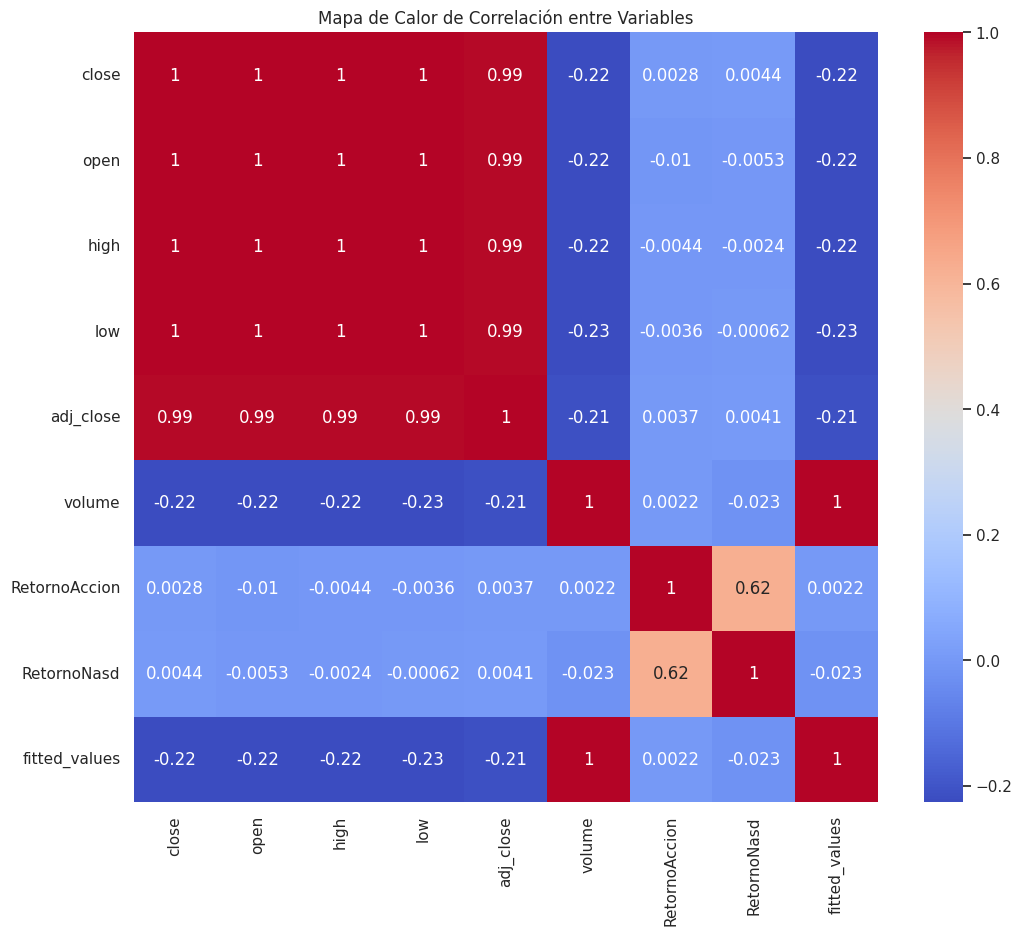

In [ ]:
# Gráfico 3: Distribución de los Retornos de las Acciones
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['RetornoAccion'], kde=True, bins=30, color='green')
plt.title('Distribución de los Retornos de las Acciones')
plt.xlabel('Retorno de la Acción')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico 4: Heatmap de la correlación entre diferentes variables numéricas
plt.figure(figsize=(12, 10))
correlation_matrix =data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


